![Pandas logo](img/pandas.svg)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.training import *

# Time Series

One of the most flexible things in Pandas is its handling of time series data.  We have seen some of that already in the `.dt` accessor for datetime columns.  It gives us quite a bit more, and it does it across many time scales.  I.e. it will work well with yearly observations of eons, and it will work well with microscond observations over a millisecond of some short event.

In this module, we will look at a subset of the NOAA data again.  This time we will look at just one weater station to focus on the time series aspect only.  The fields that are therefore the same for every row are pulled out, and are these values:

```
NAME         VERLEGENHUKEN, NO
STATION             1002099999
LATITUDE                 80.05
LONGITUDE                16.25
ELEVATION                    8
```

What remains is only fields that are variable with date, or at least that can be.  Moreover, the data you will read in has no meaningful order, although it was deterministically "randomized" based on the data (*Extra bonus credit to any student who figures out the original order*).

In [2]:
df = pd.read_csv('data/verlegenhuken.csv', parse_dates=['DATE'])
df.head()

,DATE,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,2019-03-15,-2.3,21,-6.0,21,...,*,0.0,I,999.9,0
1,2019-10-25,22.6,22,15.0,22,...,*,0.0,I,999.9,0
2,2019-09-28,26.2,23,21.0,23,...,*,0.0,I,999.9,0
3,2019-03-04,-7.5,22,-12.0,22,...,,0.0,I,999.9,0
4,2019-11-04,14.9,22,9.0,22,...,*,0.0,I,999.9,0


## Time Series Index

Very often the most useful way to treat a date column is by making it the index column.  Moroever, in time series data, we almost always want to treat it in sequential order.

In [3]:
df = df.set_index('DATE')
df = df.sort_index()
df

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,
2019-01-01,-0.1,23,-4.0,23,1010.3,...,,0.0,I,999.9,0
2019-01-03,19.7,24,15.1,24,1003.9,...,,0.0,I,999.9,0
2019-01-04,14.3,22,11.2,22,1008.5,...,*,0.0,I,999.9,0
2019-01-05,16.1,23,13.0,23,1004.1,...,*,0.0,I,999.9,0
2019-01-06,20.0,21,17.0,21,998.0,...,*,0.0,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,11.3,23,7.7,23,1021.3,...,*,0.0,I,999.9,0
2019-12-17,7.1,21,3.4,21,1020.0,...,*,0.0,I,999.9,0
2019-12-18,6.2,24,2.5,24,1016.5,...,*,0.0,I,999.9,0


## Missing Index Values

There is a problem that may not be immediately obvious.  The periodicity of the data is generally daily measurements, but some are missing.  We can get a hint about this by noticing there are 344 rows in our DataFrame.  But comparing the now sorted date index:

In [4]:
# We could have done same with the regular DATE column
df.index[-1] - df.index[0]

Timedelta('353 days 00:00:00')

In [5]:
# Alternately, if perhaps not sorted (same for regular column)
df.index.max() - df.index.min()

Timedelta('353 days 00:00:00')

## Filling Indices

For many analyses we want regular intervals in our data.  Pandas lets us fill in our DataFrame to match whatever frequency we would like.  Notice that January 2 is added, although so far with NaNs for the missing values.

In [6]:
# Has 354, not 353, rows because of "fence posts"
df.asfreq('D')

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,
2019-01-01,-0.1,23.0,-4.0,23.0,1010.3,...,,0.0,I,999.9,0.0
2019-01-02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-03,19.7,24.0,15.1,24.0,1003.9,...,,0.0,I,999.9,0.0
2019-01-04,14.3,22.0,11.2,22.0,1008.5,...,*,0.0,I,999.9,0.0
2019-01-05,16.1,23.0,13.0,23.0,1004.1,...,*,0.0,I,999.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,11.3,23.0,7.7,23.0,1021.3,...,*,0.0,I,999.9,0.0
2019-12-17,7.1,21.0,3.4,21.0,1020.0,...,*,0.0,I,999.9,0.0
2019-12-18,6.2,24.0,2.5,24.0,1016.5,...,*,0.0,I,999.9,0.0


It does not make sense for this example, but other frequencies are equally possible.

In [8]:
# Do NOT modify the original DataFrame, just demonstrating
df.copy().asfreq('6h').head(10)

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,
2019-01-01 00:00:00,-0.1,23.0,-4.0,23.0,1010.3,...,,0.0,I,999.9,0.0
2019-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-01 18:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-03 00:00:00,19.7,24.0,15.1,24.0,1003.9,...,,0.0,I,999.9,0.0


In [9]:
# Do NOT modify the original DataFrame, just demonstrating
df.asfreq('5d').head()

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,
2019-01-01,-0.1,23.0,-4.0,23.0,1010.3,...,,0.0,I,999.9,0.0
2019-01-06,20.0,21.0,17.0,21.0,998.0,...,*,0.0,I,999.9,0.0
2019-01-11,14.2,22.0,9.7,22.0,1005.1,...,,0.0,I,999.9,0.0
2019-01-16,12.6,23.0,8.3,23.0,1003.8,...,,0.0,I,999.9,0.0
2019-01-21,2.2,22.0,-2.0,22.0,1018.9,...,*,0.0,I,999.9,0.0


In [11]:
# We will use the daily sampling now
df = df.asfreq('1d')
df

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,
2019-01-01,-0.1,23.0,-4.0,23.0,1010.3,...,,0.0,I,999.9,0.0
2019-01-02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2019-01-03,19.7,24.0,15.1,24.0,1003.9,...,,0.0,I,999.9,0.0
2019-01-04,14.3,22.0,11.2,22.0,1008.5,...,*,0.0,I,999.9,0.0
2019-01-05,16.1,23.0,13.0,23.0,1004.1,...,*,0.0,I,999.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,11.3,23.0,7.7,23.0,1021.3,...,*,0.0,I,999.9,0.0
2019-12-17,7.1,21.0,3.4,21.0,1020.0,...,*,0.0,I,999.9,0.0
2019-12-18,6.2,24.0,2.5,24.0,1016.5,...,*,0.0,I,999.9,0.0


## Filling Values

So far we just have `NaN` values filling in all the features for the added days.  That is not wrong, necessarily, but we might want to impute some values for that missing data in order to fit some smooth model we are working with.  Obviouly, invented values are not true observations, but they are often useful if used with awareness of this limit.

There are three main techniques for imputing values:

* Forward fill: take the prior value and assume the next is the same
* Backward fill: take the subsequent value and use that where missing
* Interpolation: Use some functional form to impute values based on others in the series
  * The default and far most common technique is `linear` which just averages adjacent values
  * The `time` option can be useful if your datetime index is not regularized; essentially it is linear if the missing rows *had been* added
  * A number of other more complex curve fitting techniques are available, but much more specialized

In [12]:
# Look at Jan 2 example
df.loc[:, ['TEMP', 'DEWP']].ffill().head(4)

,TEMP,DEWP
DATE,,
2019-01-01,-0.1,-4.0
2019-01-02,-0.1,-4.0
2019-01-03,19.7,15.1
2019-01-04,14.3,11.2


In [13]:
# Look at Jan 2 example
df.loc[:, ['TEMP', 'DEWP']].bfill().head(4)

,TEMP,DEWP
DATE,,
2019-01-01,-0.1,-4.0
2019-01-02,19.7,15.1
2019-01-03,19.7,15.1
2019-01-04,14.3,11.2


In [14]:
# Look at Jan 2 example
# "linear" is default if not specified
df = df.interpolate(method="linear")
df.loc[:, ['TEMP', 'DEWP']].head(4)

,TEMP,DEWP
DATE,,
2019-01-01,-0.1,-4.00
2019-01-02,9.8,5.55
2019-01-03,19.7,15.10
2019-01-04,14.3,11.20


## Resampling

Although it goes by a different name, resampling is essentially the same thing as `.groupby()`.  The difference is that the groups are defined by time periods.  In principle, we could achieve the same effect by creating a synthetic feature for the time period, but this use is common enough that a shortcut is much easier.

In [15]:
# The average temperature and dew point in each 2 week window
df.loc[:, ['TEMP', 'DEWP']].resample('2w').mean()

,TEMP,DEWP
DATE,,
2019-01-06,13.300000,9.641667
2019-01-20,12.185714,6.621429
2019-02-03,18.764286,11.057143
2019-02-17,12.282143,6.353571
2019-03-03,1.557143,-2.700000
...,...,...
2019-10-27,20.950000,15.107143
2019-11-10,17.364286,11.871429
2019-11-24,24.478571,18.414286


In [16]:
# The maximum temperature and dew point in each 2 week window
# Some aggregation is always required, as with .groupby
df.loc[:, ['TEMP', 'DEWP']].resample('2w').max().head()

,TEMP,DEWP
DATE,,
2019-01-06,20.0,17.0
2019-01-20,20.1,15.1
2019-02-03,27.9,22.2
2019-02-17,26.2,18.4
2019-03-03,18.3,16.2


## Rolling Windows

Strictly speaking, rolling windows do not depend on having datetime columns, only on ordered data.  The idea is only to look at some adjacent element in whatever order the data is sorted.  However, this is particularly likely to be useful for time series.

A rolling window is often more powerful than fixed windows.  Rather than, for example, take every two week block as a distinct group to aggregate over, we can effectively take every two week window around the current row as the aggregation unit.

In [17]:
rolling = df.loc[:, ["TEMP", "DEWP"]].rolling(window=14).mean()
rolling.columns = ["roll_%s" % col for col in rolling.columns]
rolling.loc['2019-01-13':'2019-01-20', ['roll_TEMP', 'roll_DEWP']]

,roll_TEMP,roll_DEWP
DATE,,
2019-01-13,NaN,NaN
2019-01-14,15.114286,10.317857
2019-01-15,15.971429,11.103571
2019-01-16,16.171429,11.300000
2019-01-17,15.235714,10.292857
2019-01-18,14.528571,9.378571
2019-01-19,13.471429,8.114286
2019-01-20,12.185714,6.621429


Let us compare the rolling average temperature to the actual daily temperature.

In [18]:
(rolling
     .join(df)
     .iloc[12:26]
     .loc[:, ['TEMP', 'roll_TEMP']]
)

,TEMP,roll_TEMP
DATE,,
2019-01-13,15.4,NaN
2019-01-14,14.0,15.114286
2019-01-15,11.9,15.971429
2019-01-16,12.6,16.171429
2019-01-17,6.6,15.235714
...,...,...
2019-01-22,3.4,10.092857
2019-01-23,10.9,9.450000
2019-01-24,18.5,9.335714


Likewise as a plot to compare the columns.

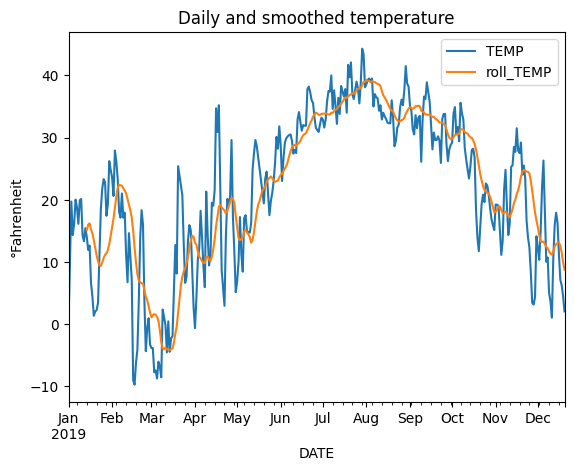

In [19]:
(rolling
     .join(df)
     .loc[:, ['TEMP', 'roll_TEMP']]
     .plot(title="Daily and smoothed temperature")
     .set(ylabel='°Fahrenheit')
);

# Exercises

For the below exercises, we will read in the same dataset for Verlegenhuken as in this module.  You may want to perform the same or similar cleanup we did in the lessons to solve the problems.

For some of these problems, it might be useful to look at more rows than the default configuration of 10.  We provide a small context manager to do this within one cell.  For example:

```python
# If new_max not given, show all possible
with show_all_rows(new_max=100):
    print(my_df)
```

In [ ]:
from src.pandas_exercises import *
verl = pd.read_csv('data/verlegenhuken.csv', parse_dates=['DATE'], index_col='DATE')
verl.head()

Question: Which month had the most forceful wind gust? 

In [ ]:
# Identify month with most foreceful gust
...

Followup: Can you say with certainty based on the data available? Why not?

In [ ]:
# Explain answer with prose or code
...

Question: Which month had the lowest typical wind speed? Again explain any caveats.

In [ ]:
# Identify least windy month
...

---

Produce a two month rolling average of the dew point and select 10-day intervals from that result.

In [ ]:
# The desired answer is in ex7_1.result for guidance
ex7_1.result

---

Month by month, what was the change in atmospheric pressure between the first and last day of the month?

In [ ]:
# The desired answer is in ex7_2.result for guidance
with show_all_rows():
    print(ex7_2.result)